<a href="https://colab.research.google.com/github/antuness/Deep_Learning_with_Pytorch/blob/main/Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

-4.4


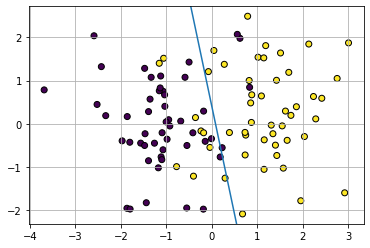

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1,w2,b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            edgecolor='k')

## vou fizar máximo e mínimo para melhor visualização

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2,4,50)
  y = (-w1*x - b)/w2

  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b = -0.4 ## se eu mudar, ela muda a reta no espaço
plotmodel(w1,w2,b)

## para eu ter uma visão dos valor + e -
p = (-1,1)
print(w1 * p[0] + w2 * p[1] + b)

In [3]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

# dando valores para os meus pesos e bias
perceptron.weight = nn.Parameter(torch.Tensor([[5,1]]))
perceptron.bias = nn.Parameter(torch.Tensor([-0.4]))

print(perceptron.weight.data)
print(perceptron.bias.data)


tensor([[ 0.0907, -0.0471]])
tensor([-0.3394])
tensor([[5., 1.]])
tensor([-0.4000])


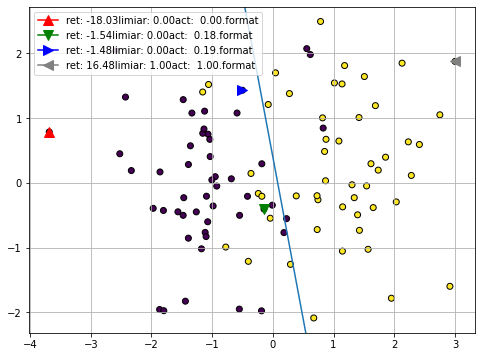

In [9]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8,6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}.format'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()